In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

## 1.1

### Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coeﬃcient trajectories. Comment on which are the ﬁnal three predictors that remain in the model. Use cross-validation to ﬁnd the optimal value of the regularization penality. How many predictors are left in that model?


In [2]:

def preprocessing_data(path, target):
    data = pd.read_csv(path).dropna()
    data = data.drop([data.columns[0]], axis=1)
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_data= data.select_dtypes(include=numerics)
    
    predictor = numeric_data[target]
    evaluators = numeric_data.loc[:,numeric_data.columns != target]
    
    return numeric_data, predictor, evaluators

def Lasso_function(predictor, evaluators):
    
    alphas = 10**np.linspace(5,-5,50)*0.5
    
    lasso = Lasso(max_iter = 10000, normalize = True)
    coefs = []

    for a in alphas:
        lasso.set_params(alpha=a)
        lasso.fit(scale(evaluators), predictor)
        coefs.append(lasso.coef_)

    ax = plt.gca()
    ax.plot(alphas*2, coefs)
    ax.set_xscale('log')
    plt.axis('tight')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.figure(figsize=(8,8))
    plt.show()
    
    
def cross_validation(predictor, evaluators):
    lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
    lassocv.fit(evaluators, predictor)
    
    print("Best alpha using built-in LassoCV: %f" % lassocv.alpha_)
    
    col_left = pd.Series(lassocv.coef_, index=evaluators.columns).sort_values(ascending=False)
    
    return col_left

In [3]:
numeric_data, predictor, evaluators = preprocessing_data(path = "Hitters.csv", target = "Salary")

In [4]:
numeric_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [5]:
# show the target
predictor.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [6]:
# show the evaluators
evaluators.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


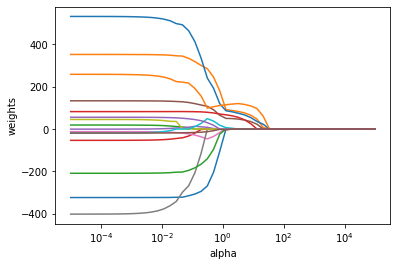

<Figure size 576x576 with 0 Axes>

In [7]:
# visualization of the coeffcient trajectories.
Lasso_function(predictor, evaluators)

In [8]:
col_left = cross_validation(predictor, evaluators)[:]
col_left

Best alpha using built-in LassoCV: 0.063548


Hits       7.041011
Walks      5.511781
CRuns      1.228061
CRBI       0.583821
RBI        0.496552
Assists    0.304372
PutOuts    0.292694
CHmRun     0.156468
CHits      0.000000
HmRun      0.000000
CAtBat    -0.087066
Runs      -0.682615
CWalks    -0.690601
AtBat     -2.082954
Errors    -2.450795
Years     -6.107625
dtype: float64

##### Based on the list above, the last 3 columns left in the regression are: Hits, Walks, and CRuns.
##### And the number of total variables remain in the model is 14

## 1.2 

### Repeat with Ridge Regression. Visualize coeﬀecient trajectories. Use cross validation to ﬁnd the optimal vaule of the regularization penalty.

In [51]:
def Ridge_function(predictor, evaluators):
    alphas = 10**np.linspace(5,-5,50)*0.5
    
    ridge = Ridge(normalize = True)
    coefs = []

    for a in alphas:
        ridge.set_params(alpha = a)
        ridge.fit(evaluators, predictor)
        coefs.append(ridge.coef_)

    
    ax = plt.gca()
    ax.plot(alphas*2, coefs)
    ax.set_xscale('log')
    plt.axis('tight')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.figure(figsize=(8,8))
    plt.show()
    
    return alphas
    
    
def cross_validation(alphas,predictor, evaluators):
    
    
    ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
    ridgecv.fit(evaluators,predictor)


    print("Best alpha using built-in LassoCV: %f" % ridgecv.alpha_)
    
    col_left = pd.Series(ridgecv.coef_, index=evaluators.columns).sort_values(ascending=False)
    
    return col_left

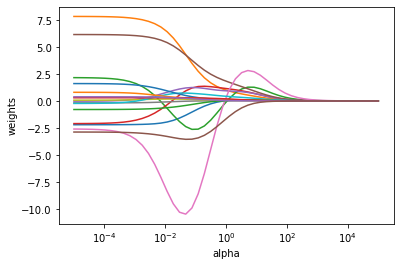

<Figure size 576x576 with 0 Axes>

In [52]:
alphas = Ridge_function(predictor, evaluators)

In [53]:
col_left = cross_validation(alphas, predictor, evaluators)

Best alpha using built-in LassoCV: 0.009210


In [54]:
col_left

Hits       5.831628
Walks      5.095739
RBI        0.966947
CRuns      0.781111
CHmRun     0.684259
CRBI       0.355898
Assists    0.303726
PutOuts    0.290063
CHits      0.177286
Runs       0.101164
CAtBat    -0.064003
CWalks    -0.568158
HmRun     -1.320305
AtBat     -1.798010
Errors    -3.394210
Years     -9.526100
dtype: float64

## 2

### Short Answer. Explain in your own words the bias-variance tradeoﬀ. What role does regularization play in this tradeoﬀ? Make reference to your ﬁndings in number (1) to describe models of high/low bias and variance.